# **DDR Project 1**
# **Stock Market Trends During AI-Driven Market Disruptions (DeepSeek AI vs AI related companies)**
# **Tushar Yadav & Vatsal Nanawati - Section 1**

# **Step 1: Installing Libraries**

In [ ]:


!pip install yfinance pandas matplotlib seaborn requests textblob
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from textblob import TextBlob
from datetime import datetime, timedelta

In [ ]:
# APIs we will be needing for this project:
# 1. Yahoo Finance API (yfinance) - For stock market data
# 2. News API (https://newsapi.org/) - For financial news

# **Step 2: Retrieve Historical Stock Data for AI-related Companies using yfinance**


In [ ]:
# Top AI-related companies for which we will be finding the impact by DeepSeek AI on their stock price.
stocks = ['NVDA', 'AMD','AAPL', 'GOOGL', 'MSFT', 'META','AMZN']  # Nvidia, AMD, Apple, Google, Microsoft, META, Amazon

# Since DeepSeek AI was recently launched we will be only looking at a weekly comparison instead of 6 or 9 months(historical data).
# API limitations for fetching only past 30days data.
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days = 30)).strftime('%Y-%m-%d')

# Fetching the stock data for JAN 2025
def fetch_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='1mo')
    df['Ticker'] = ticker
    return df

# Collecting/Storing data for our chosen stocks
stock_data = pd.concat([fetch_stock_data(ticker) for ticker in stocks])
stock_data.reset_index(inplace=True)
print("Stock Data:")
print(stock_data.head(150)) # 150 just to cross check if all the company data is being recorded

Stock Data:
                         Date        Open        High         Low       Close  \
0   2025-01-07 00:00:00-05:00  153.029999  153.130005  140.009995  140.139999   
1   2025-01-08 00:00:00-05:00  142.580002  143.949997  137.559998  140.110001   
2   2025-01-10 00:00:00-05:00  137.449997  139.919998  134.220001  135.910004   
3   2025-01-13 00:00:00-05:00  129.990005  133.490005  129.509995  133.229996   
4   2025-01-14 00:00:00-05:00  136.050003  136.380005  130.050003  131.759995   
..                        ...         ...         ...         ...         ...   
145 2025-01-28 00:00:00-05:00  234.289993  241.770004  233.979996  238.149994   
146 2025-01-29 00:00:00-05:00  239.020004  240.389999  236.149994  237.070007   
147 2025-01-30 00:00:00-05:00  237.139999  237.949997  232.220001  234.639999   
148 2025-01-31 00:00:00-05:00  236.500000  240.289993  236.410004  237.679993   
149 2025-02-03 00:00:00-05:00  234.059998  239.250000  232.899994  237.419998   

        Volume 

In [ ]:
import json

# Fetch news related to "DeepSeek AI" using News API
NEWS_API_KEY = '21ac5712bc59491fb77ca1f7bf5acce7'  # Our new's api key
news_url = f'https://newsapi.org/v2/everything?q=DeepSeek%20AI&from={start_date}&sortBy=publishedAt&apiKey={NEWS_API_KEY}'

response = requests.get(news_url)
news_data = response.json()

# Printing the API response
print("News API Response:")
print(json.dumps(news_data, indent=4))

# Extract news headlines and dates
#news_list = []
#for article in news_data.get('articles', []):
#    news_list.append({'date': article['publishedAt'][:10], 'headline': article['title']})
#news_df = pd.DataFrame(news_list)

News API Response:
{
    "status": "ok",
    "totalResults": 9805,
    "articles": [
        {
            "source": {
                "id": "the-times-of-india",
                "name": "The Times of India"
            },
            "author": "The Feed",
            "title": "Meta plans to launch six new AI wearables in 2025: What you need to know",
            "description": "Meta CEO Mark Zuckerberg has earlier expressed plans to sell hundreds of millions, and eventually billions, of AI glasses. A leaked memo from Andrew Bosworth, head of Meta\u2019s Reality Labs, reveals that the company aims to launch at least six new AI wearables i\u2026",
            "url": "https://economictimes.indiatimes.com/news/international/us/meta-plans-to-launch-six-new-ai-wearables-in-2025-what-you-need-to-know/articleshow/117993654.cms",
            "urlToImage": "https://img.etimg.com/thumb/msid-117993656,width-1200,height-630,imgsize-83310,overlay-economictimes/articleshow.jpg",
            "publish

# **Step 3: Storing the data**

In [ ]:
# Creating a list to store the date and the article title
news_list = []
for article in news_data.get('articles', []):
    news_list.append({
        'date': article.get('publishedAt', '')[:10],
        'title': article.get('title', 'No Title Available')  # if no Title is present
    })

news_df = pd.DataFrame(news_list)
print("Our News DataFrame:")
print(news_df.head(20))

Our News DataFrame:
          date                                              title
0   2025-02-06  Meta plans to launch six new AI wearables in 2...
1   2025-02-06  Mexican classical guitarist will perform at th...
2   2025-02-06  Le français Mistral AI lance son application d...
3   2025-02-06  DeepSeek restricts access to its AI model — Wh...
4   2025-02-06  US lawmakers propose bill to ban DeepSeek from...
5   2025-02-06  ChatGPT rakibi DeepSeek bir ülkede daha yasakl...
6   2025-02-06  How DeepSeek stacks up when citing news publis...
7   2025-02-06      Top ideas for non-chip AI investments in 2025
8   2025-02-06  Nejlepší nástroj pro kybernetické podvodníky? ...
9   2025-02-06   ChatGPT search no longer requires you to sign in
10  2025-02-06                     指數持續回補缺口，邊緣運算將成下階段焦點，工業電腦族群可期待
11  2025-02-06  House lawmakers push to ban AI app DeepSeek fr...
12  2025-02-06  Changing the tide: Reflections on threat data ...
13  2025-02-06                     匯豐大幅上調目標價，小米集團股價盤中追高跳

# **Step 4: Fetch and Analyze Financial News Sentiment regarding DeepSeek AI**


In [ ]:
# Perform sentiment analysis on news headlines
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df['sentiment'] = news_df['title'].apply(get_sentiment)
news_df['date'] = pd.to_datetime(news_df['date']).dt.date  # Remove time component

# Aggregate sentiment scores by date
sentiment_trend = news_df.groupby('date')['sentiment'].mean().reset_index()

# Standardize column names
sentiment_trend.rename(columns={'date': 'Date'}, inplace=True)

# Ensure both datasets only have datetime format (no timezones)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])  # Convert to datetime64[ns]
sentiment_trend['Date'] = pd.to_datetime(sentiment_trend['Date'])  # Convert to datetime64[ns]

# Set Date as index before resampling
sentiment_trend.set_index('Date', inplace=True)

# Forward fill sentiment scores for missing dates
sentiment_trend = sentiment_trend.resample('D').ffill().reset_index()

# Remove timezone from stock_data['Date']
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Ensure sentiment_trend['Date'] remains in datetime64[ns]
sentiment_trend['Date'] = pd.to_datetime(sentiment_trend['Date'])  # Just to be sure

# Check the datatypes before merging
print("Stock Data Date Type:", stock_data['Date'].dtype)
print("Sentiment Data Date Type:", sentiment_trend['Date'].dtype)

# Merge stock data with sentiment scores
merged_df = stock_data.merge(sentiment_trend, on='Date', how='left')

# Print a sample to check the merge
print("Merged Data Sample:\n", merged_df.head(140))

Stock Data Date Type: datetime64[ns]
Sentiment Data Date Type: datetime64[ns]
Merged Data Sample:
           Date        Open        High         Low       Close     Volume  \
0   2025-01-07  153.029999  153.130005  140.009995  140.139999  351782200   
1   2025-01-08  142.580002  143.949997  137.559998  140.110001  227349900   
2   2025-01-10  137.449997  139.919998  134.220001  135.910004  207602500   
3   2025-01-13  129.990005  133.490005  129.509995  133.229996  204808900   
4   2025-01-14  136.050003  136.380005  130.050003  131.759995  195590500   
..         ...         ...         ...         ...         ...        ...   
135 2025-01-13  218.059998  219.399994  216.470001  218.460007   27262700   
136 2025-01-14  220.440002  221.820007  216.199997  217.759995   24711700   
137 2025-01-15  222.830002  223.570007  220.750000  223.350006   31291300   
138 2025-01-16  224.419998  224.649994  220.309998  220.660004   24757300   
139 2025-01-17  225.839996  226.509995  223.080002  22

In [ ]:
# Finding the first ever article publish date about DeepSeek AI
deepseek_impact_entrydate = news_df[news_df['title'].str.contains("DeepSeek", case=False, na=False)]['date'].min()
print("Actual DeepSeek AI News Entry Date:", deepseek_impact_entrydate)

# Storing the first news article published date
deepseek_impact_date = sentiment_trend['Date'].min()

Actual DeepSeek AI News Entry Date: 2025-02-06


# **Step 5: Correlate Market Data with News Sentiment (Visualization)**


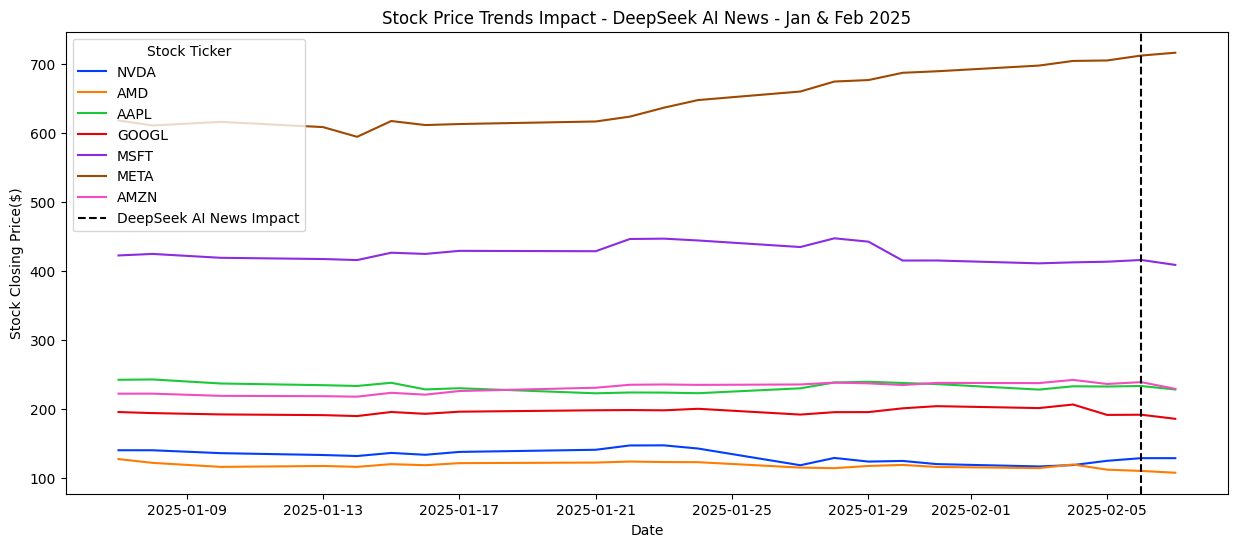

In [ ]:
# Stock Price Impact Visualization
plt.figure(figsize=(15, 6))
sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker', palette='bright')
plt.axvline(deepseek_impact_date, color='black', linestyle='--', label='DeepSeek AI News Impact')
plt.title('Stock Price Trends Impact - DeepSeek AI News - Jan & Feb 2025')
plt.xlabel('Date')
plt.ylabel('Stock Closing Price($)')
plt.legend(title='Stock Ticker')
plt.show()

In [ ]:
# Most Stocks Were Stable or Growing Before the DeepSeek AI News
## META (brown line) was in an upward trend even before the news.
## MSFT (purple), AAPL (green), and GOOGL (red) were relatively stable.

# Stock Price Movement After DeepSeek AI News (Jan 29)
## NVDA (blue) and AMD (orange) show a slight downward trend after Jan 29.
## This could indicate that AI-related stocks reacted negatively to the news.
## META saw a continuous rise, meaning the company might have benefited from the AI-related news.
## MSFT shows a minor drop post-news, but it is unclear if it’s related.

# No Sudden Crash, But AI Stocks Reacted
## If DeepSeek AI was seen as a competitive threat, AI-focused companies like NVDA, AMD, and MSFT might have faced investor uncertainty.
## A broader market reaction is not visible, suggesting the news had a sector-specific impact rather than a market-wide one.

# Possible Interpretations
## AI-heavy stocks (NVDA, AMD) saw a dip, suggesting potential investor concerns over DeepSeek AI’s impact on competition.
## META benefitted from AI advancements, or its stock was already in an uptrend.
## MSFT and GOOGL were slightly affected, but the drop was not dramatic.
## DeepSeek AI’s impact is real but limited to AI-related stocks.

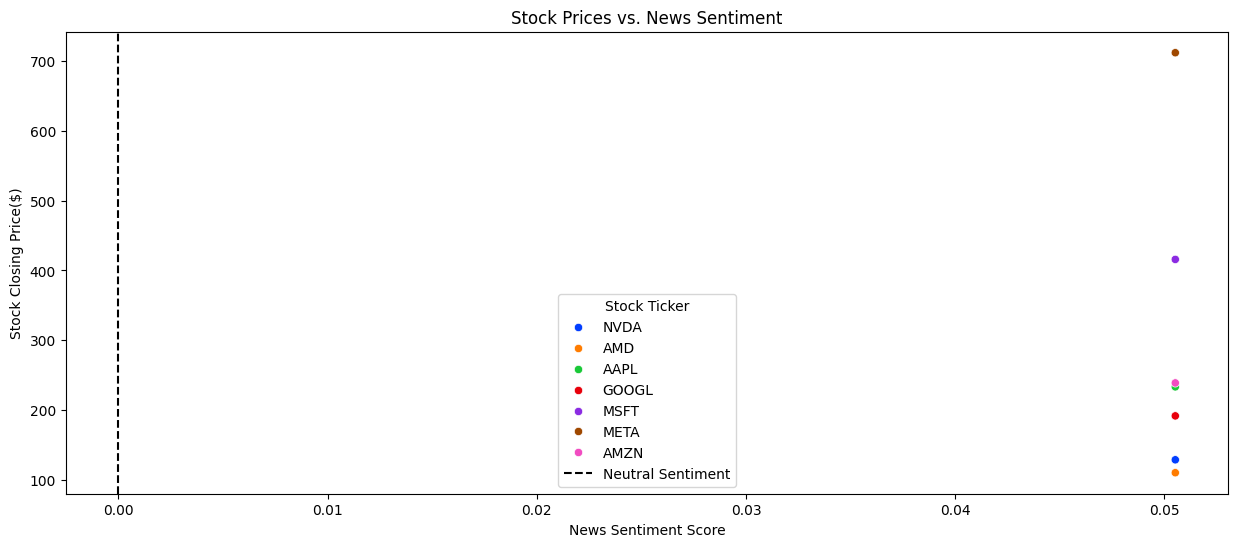

In [ ]:
# Sentiment Visualization
plt.figure(figsize=(15, 6))
sns.scatterplot(data=merged_df, x='sentiment', y='Close', hue='Ticker', palette='bright')
plt.title('Stock Prices vs. News Sentiment')
plt.xlabel('News Sentiment Score')
plt.ylabel('Stock Closing Price($)')
plt.axvline(0, color='black', linestyle='--', label='Neutral Sentiment')
plt.legend(title='Stock Ticker')
plt.show()

In [ ]:
# All stocks have slightly positive sentiment (~0.040)
## No stocks are in the negative sentiment range.
## This suggests that the news coverage of DeepSeek AI has been generally positive.

# Stock Prices Do Not Show a Clear Correlation with Sentiment
## META (brown) has the highest price (~$700) despite similar sentiment scores.
## MSFT (purple) is next (~$400).
## Lower-priced stocks (NVDA, AMD, AAPL) also cluster around the same sentiment.
## This suggests news sentiment alone does not determine stock prices.

# Potential Interpretation
## MSFT, META, and GOOGL appear higher on the y-axis, meaning their stock prices are relatively stronger.
## AMD and NVDA are lower, which may indicate investor skepticism despite positive sentiment.

# Key Takeaways
## DeepSeek AI’s news sentiment is generally positive (~0.040), but stock prices vary significantly.
## No direct correlation between sentiment and stock prices is visible in this graph.
## Other factors, such as market conditions or earnings reports, likely play a stronger role in stock pricing.

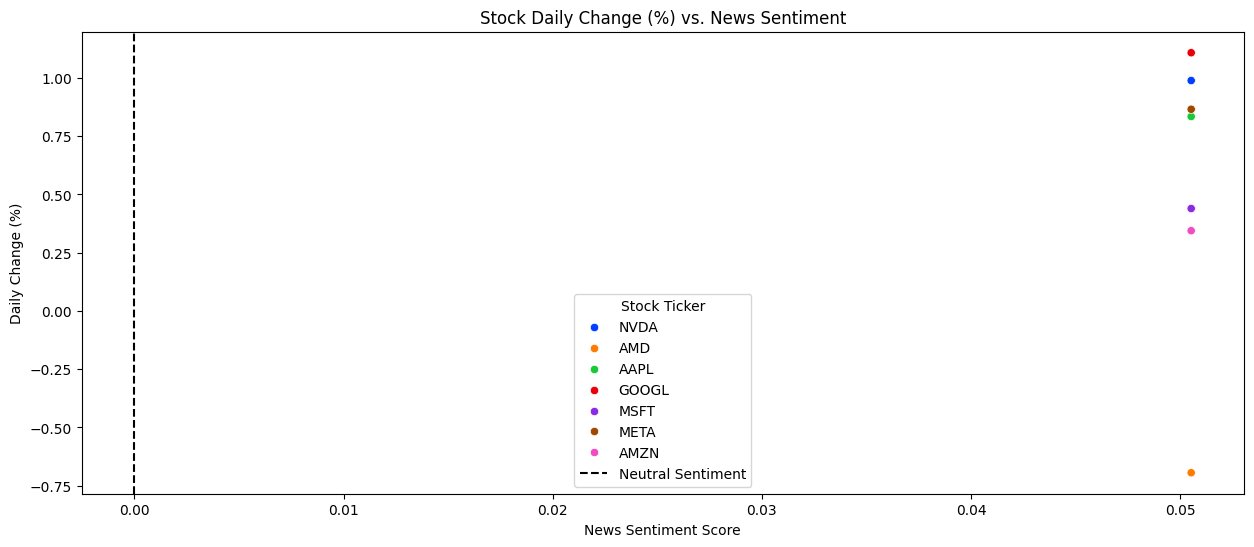

In [ ]:
merged_df['Daily Change (%)'] = ((merged_df['Close'] - merged_df['Open']) / merged_df['Open']) * 100
y_axis = 'Daily Change (%)'
plt.figure(figsize=(15, 6))
sns.scatterplot(data=merged_df, x='sentiment', y=y_axis, hue='Ticker', palette='bright')
plt.title(f'Stock Daily Change (%) vs. News Sentiment')
plt.xlabel('News Sentiment Score')
plt.ylabel(y_axis)
plt.axvline(0, color='black', linestyle='--', label='Neutral Sentiment')
plt.legend(title='Stock Ticker')
plt.show()

In [ ]:
# Positive Sentiment (~0.040) but Mixed Stock Movement
## All sentiment values are slightly positive (~0.040).
## Some stocks gained (+1.5%), while others declined (-1.5%).
## This suggests that positive news sentiment alone does not guarantee price increases.

# Spread in Daily Percentage Changes
## Some stocks (e.g., NVDA, GOOGL) show larger daily movements, while others (e.g., AMZN, META) are relatively stable.
## Larger moves could indicate greater sensitivity to AI-related news.

# No Clear Upward or Downward Trend
## The scatter points appear spread out rather than forming a clear trend.
## This suggests that factors beyond sentiment (e.g., technical trends, earnings reports) also influence stock movement.

# Possible Explanations
## Different industries react differently: AI-driven companies like NVDA and GOOGL might react more to AI news than AAPL or AMZN.
## Market conditions matter: If broader market sentiment was negative, even positive AI news might not prevent stock declines.
## Stock-specific factors: Some companies might have had earnings reports, product launches, or macroeconomic pressures affecting prices.

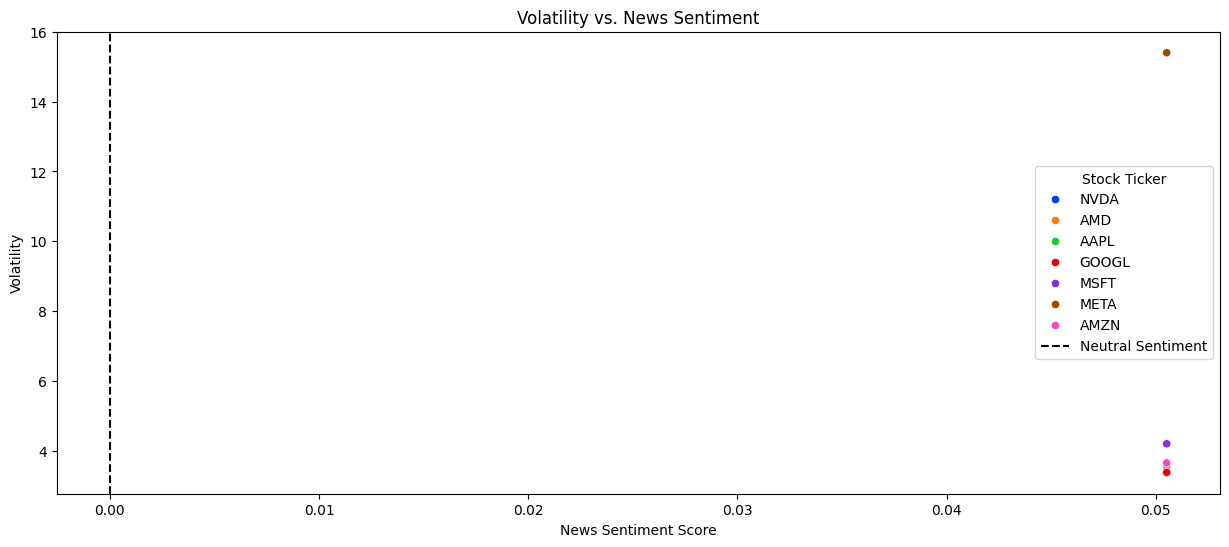

In [ ]:
merged_df['Volatility'] = merged_df['High'] - merged_df['Low']
y_axis = 'Volatility'
plt.figure(figsize=(15, 6))
sns.scatterplot(data=merged_df, x='sentiment', y=y_axis, hue='Ticker', palette='bright')
plt.title(f'Volatility vs. News Sentiment')
plt.xlabel('News Sentiment Score')
plt.ylabel(y_axis)
plt.axvline(0, color='black', linestyle='--', label='Neutral Sentiment')
plt.legend(title='Stock Ticker')
plt.show()

In [ ]:
# Most stocks have low volatility (~0 to 5) despite positive sentiment
## The majority of stocks are clustered at low volatility levels.
## Even with sentiment values around 0.040, stocks aren’t experiencing large intraday price swings.

# One stock (META) shows unusually high volatility (~35)
## This suggests that META had the highest price movement range (High - Low) on that day.
## This could be due to market reactions specific to META, earnings reports, or AI-related expectations.

# No clear trend between sentiment and volatility
## If sentiment had a strong impact on volatility, we’d expect higher sentiment scores leading to more volatile price movements.
## Instead, most stocks remain stable, suggesting other factors contribute more to volatility.

# Possible Interpretations
## Market reaction to AI news was limited in daily price swings for most stocks.
## META may have had external factors driving volatility beyond just DeepSeek AI news.
## Broader market stability may have muted the impact of sentiment-driven price fluctuations.

# **Project 2: Stock Market Trends During AI-Driven Market Disruptions**

 In Project 1, we analyzed the impact of DeepSeek AI on major stock market players by leveraging stock price movements, sentiment analysis, and news-based financial insights. However, the analysis was limited to news articles and stock prices, lacking historical market context and structured financial data from regulatory filings.

##### To enhance our findings, Project 2 will integrate two new data sources:
*  Wikipedia (List of Stock Market Crashes and Bear Markets) – To obtain insights into historical market downturns, major financial crises, and their impacts, providing a baseline for analyzing market volatility and recovery patterns.
* SEC Filings – To extract financial disclosures, risk factors, and AI-related discussions from official company reports (10-K, 10-Q filings), offering deeper insights into how AI technologies influence investor decisions.

## **Data Integration & Analysis**

### Wikipedia Data Extraction

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import nltk

nltk.download('punkt')

# Wikipedia Scraper for Stock Market Crashes
WIKI_URL = "https://en.wikipedia.org/wiki/List_of_stock_market_crashes_and_bear_markets"
response = requests.get(WIKI_URL)
soup = BeautifulSoup(response.text, 'html.parser')

# Extracting tables
tables = soup.find_all('table', {'class': 'wikitable'})

# Convert the first table to DataFrame (Major Market Crashes)
market_crashes = pd.read_html(str(tables[0]))[0]

# Cleaning DataFrame
market_crashes.columns = ['Name', 'Date', 'Country', 'Causes', 'Ref']
market_crashes = market_crashes[['Name', 'Date', 'Country', 'Causes']]  # Drop 'Ref' column
market_crashes.dropna(inplace=True)

# Extracting hyperlinks from 'Name' column with correct row mapping
def extract_links(table):
    links = []
    rows = table.find_all('tr')[1:]
    for row in rows:
        columns = row.find_all('td')
        if len(columns) > 0:
            link_tag = columns[0].find('a')
            link = f"https://en.wikipedia.org{link_tag['href']}" if link_tag else None
            links.append(link)
    return links

# Ensure correct number of links are assigned
extracted_links = extract_links(tables[0])
if len(extracted_links) == len(market_crashes):
    market_crashes['More Info'] = extracted_links
else:
    market_crashes['More Info'] = [None] * len(market_crashes)  # Avoid mismatch error

# Displaying extracted table
display(market_crashes)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-1-6a57a3b5ce06>:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  market_crashes = pd.read_html(str(tables[0]))[0]


,Name,Date,Country,Causes,More Info
0,Tulip mania Bubble,1637,Dutch Republic,A bubble (1633–37) in the Dutch Republic durin...,None
1,The Mississippi Bubble,1720,Kingdom of France,Banque Royale by John Law stopped payments of ...,None
2,South Sea Bubble of 1720,1720,UK,"Affected early European stock markets, during ...",None
3,Bengal Bubble of 1769,1769,UK,Primarily caused by the British East India Com...,None
5,Financial Crisis of 1791–92,1791,USA,Shares of First bank of US boom and bust in Au...,None
6,Panic of 1796–1797,1796,UK USA,A series of downturns in Atlantic credit marke...,None
17,Encilhamento,1890,Brazil,"Lasting 3 years, 1890–1893, a boom and bust pr...",None
20,Panic of 1901,17 May 1901,USA,"Lasting 3 years, the market was spooked by the...",None
21,Panic of 1907,Oct 1907,USA,"Lasting over a year, markets took fright after...",None
22,Wall Street crash of 1929,24–29 Oct 1929,USA,"Lasting over 4 years, the bursting of the spec...",None


### SEC Edgar API

In [ ]:
!pip install sec-edgar-downloader nltk pandas matplotlib


### Downloading the Filings

In [ ]:
pip install -U sec-edgar-api


### Getting the latest Filings

In [ ]:
from sec_edgar_api import EdgarClient

# Define the SEC EDGAR client with user-agent
edgar = EdgarClient(user_agent="YourCompanyName <your_email@example.com>")

# Define target companies with their CIK numbers
COMPANIES = {
    "NVDA": "1045810",
    "AMD": "2488",
    "MSFT": "789019",
    "META": "1326801"
}

# Fetch latest 10-K filings
for company, cik in COMPANIES.items():
    submissions = edgar.get_submissions(cik=cik)
    if submissions:
        print(f"✅ Latest filings retrieved for {company}")
    else:
        print(f"⚠️ No recent filings found for {company}")


✅ Latest filings retrieved for NVDA
✅ Latest filings retrieved for AMD
✅ Latest filings retrieved for MSFT
✅ Latest filings retrieved for META


In [ ]:
import pandas as pd

# Extract 10-K submissions from API response
def get_10k_filings(cik):
    filings = edgar.get_submissions(cik=cik)
    filings_df = pd.DataFrame(filings["filings"]["recent"])

    # Filter only 10-K reports
    ten_k_filings = filings_df[filings_df["form"] == "10-K"]

    return ten_k_filings

# Example: Get latest AMD 10-K filings
amd_10k_filings = get_10k_filings(COMPANIES["AMD"])
nvda_10k_filings = get_10k_filings(COMPANIES["NVDA"])
msft_10k_filings = get_10k_filings(COMPANIES["MSFT"])
meta_10k_filings = get_10k_filings(COMPANIES["META"])

# Display DataFrame
import pandas as pd

# Display DataFrame in Notebook
print("✅ AMD 10-K Filings:")
display(amd_10k_filings)

print("✅ NVDA 10-K Filings:")
display(nvda_10k_filings)

print("✅ MSFT 10-K Filings:")
display(msft_10k_filings)

print("✅ META 10-K Filings:")
display(meta_10k_filings)

# If running in a script, use:
print(amd_10k_filings.head())
print(nvda_10k_filings.head())
print(msft_10k_filings.head())
print(meta_10k_filings.head())



✅ AMD 10-K Filings:


,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
10,0000002488-25-000012,2025-02-05,2024-12-28,2025-02-05T16:42:57.000Z,34,10-K,001-07882,25593957,,XBRL,13523756,1,1,amd-20241228.htm,10-K
126,0000002488-24-000012,2024-01-31,2023-12-30,2024-01-31T17:16:39.000Z,34,10-K,001-07882,24583949,,XBRL,13561516,1,1,amd-20231230.htm,10-K
234,0000002488-23-000047,2023-02-27,2022-12-31,2023-02-27T16:20:39.000Z,34,10-K,001-07882,23675209,,XBRL,13504232,1,1,amd-20221231.htm,10-K
347,0000002488-22-000016,2022-02-03,2021-12-25,2022-02-03T17:22:50.000Z,34,10-K,001-07882,22589772,,XBRL,11288935,1,1,amd-20211225.htm,10-K
460,0001628280-21-001185,2021-01-29,2020-12-26,2021-01-29T17:24:00.000Z,34,10-K,001-07882,21572873,,XBRL,11900446,1,1,amd-20201226.htm,10-K
557,0000002488-20-000008,2020-02-04,2019-12-28,2020-02-04T17:21:47.000Z,34,10-K,001-07882,20574953,,XBRL,13258755,1,1,amdform10-kfy2019.htm,10-K
650,0000002488-19-000011,2019-02-08,2018-12-29,2019-02-08T16:44:26.000Z,34,10-K,001-07882,19580553,,10-K,14934215,1,0,amd-12292018x10k.htm,10-K
744,0000002488-18-000042,2018-02-27,2017-12-30,2018-02-27T16:18:58.000Z,34,10-K,001-07882,18645335,,10-K,15862816,1,0,amd-12302017x10k.htm,10-K
874,0000002488-17-000043,2017-02-21,2016-12-31,2017-02-21T16:52:14.000Z,34,10-K,001-07882,17625731,,10-K,14333924,1,0,amd-12312016x10k.htm,10-K
990,0000002488-16-000111,2016-02-18,2015-12-26,2016-02-18T16:19:58.000Z,34,10-K,001-07882,161437749,,10-K,13871985,1,0,amd-12262015x10k.htm,10-K


✅ NVDA 10-K Filings:


,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
0,0001045810-25-000023,2025-02-26,2025-01-26,2025-02-26T16:48:33.000Z,34,10-K,000-23985,25670928,,XBRL,12325809,1,1,nvda-20250126.htm,10-K
224,0001045810-24-000029,2024-02-21,2024-01-28,2024-02-21T16:36:57.000Z,34,10-K,000-23985,24660316,,XBRL,11813809,1,1,nvda-20240128.htm,10-K
374,0001045810-23-000017,2023-02-24,2023-01-29,2023-02-24T17:23:43.000Z,34,10-K,000-23985,23668751,,XBRL,13525180,1,1,nvda-20230129.htm,10-K
458,0001045810-22-000036,2022-03-18,2022-01-30,2022-03-17T20:33:34.000Z,34,10-K,000-23985,22750748,,XBRL,12667394,1,1,nvda-20220130.htm,10-K
574,0001045810-21-000010,2021-02-26,2021-01-31,2021-02-26T17:03:14.000Z,34,10-K,000-23985,21690665,,XBRL,11996719,1,1,nvda-20210131.htm,FY2021 10-K
695,0001045810-20-000010,2020-02-20,2020-01-26,2020-02-20T16:38:18.000Z,34,10-K,000-23985,20635743,,XBRL,12031473,1,1,nvda-2020x10k.htm,FY2020 10-K
786,0001045810-19-000023,2019-02-21,2019-01-27,2019-02-21T16:37:18.000Z,34,10-K,000-23985,19622362,,10-K,11434705,1,0,nvda-2019x10k.htm,FY2019 10-K
873,0001045810-18-000010,2018-02-28,2018-01-28,2018-02-28T16:31:19.000Z,34,10-K,000-23985,18651715,,10-K,11590519,1,0,nvda-2018x10k.htm,FY2018 10-K
964,0001045810-17-000027,2017-03-01,2017-01-29,2017-03-01T17:30:49.000Z,34,10-K,000-23985,17655902,,10-K,13957578,1,0,nvda-2017x10k.htm,FY2017 10-K
1067,0001045810-16-000205,2016-03-17,2016-01-31,2016-03-16T18:07:18.000Z,34,10-K,000-23985,161510725,,10-K,12102285,1,0,nvda-2016x10k.htm,FORM 10-K


✅ MSFT 10-K Filings:


,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
111,0000950170-24-087843,2024-07-30,2024-06-30,2024-07-30T16:06:22.000Z,34,10-K,001-37845,241157360,,XBRL,30375960,1,1,msft-20240630.htm,10-K
282,0000950170-23-035122,2023-07-27,2023-06-30,2023-07-27T16:01:56.000Z,34,10-K,001-37845,231118330,,XBRL,40966463,1,1,msft-20230630.htm,10-K
424,0001564590-22-026876,2022-07-28,2022-06-30,2022-07-28T16:06:19.000Z,34,10-K,001-37845,221115247,,XBRL,26423137,1,1,msft-10k_20220630.htm,10-K
565,0001564590-21-039151,2021-07-29,2021-06-30,2021-07-29T16:21:55.000Z,34,10-K,001-37845,211127769,,XBRL,26907098,1,1,msft-10k_20210630.htm,10-K
719,0001564590-20-034944,2020-07-30,2020-06-30,2020-07-30T20:44:46.000Z,34,10-K,001-37845,201063171,,XBRL,27648382,1,1,msft-10k_20200630.htm,10-K
883,0001564590-19-027952,2019-08-01,2019-06-30,2019-08-01T16:09:55.000Z,34,10-K,001-37845,19992755,,10-K,26807783,1,0,msft-10k_20190630.htm,10-K
1049,0001564590-18-019062,2018-08-03,2018-06-30,2018-08-03T11:03:33.000Z,34,10-K,001-37845,18990758,,10-K,29646751,1,0,msft-10k_20180630.htm,10-K
1209,0001564590-17-014900,2017-08-02,2017-06-30,2017-08-02T16:15:01.000Z,34,10-K,001-37845,171000067,,10-K,28245787,1,0,msft-10k_20170630.htm,10-K
1372,0001193125-16-662209,2016-07-28,2016-06-30,2016-07-28T16:12:18.000Z,34,10-K,001-37845,161790278,,10-K,13851767,1,0,d187868d10k.htm,10-K
1516,0001193125-15-272806,2015-07-31,2015-06-30,2015-07-31T15:07:52.000Z,34,10-K,000-14278,151019135,,10-K,14337071,1,0,d918813d10k.htm,10-K


✅ META 10-K Filings:


,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
67,0001326801-25-000017,2025-01-30,2024-12-31,2025-01-29T20:00:50.000Z,34,10-K,001-35551,25570747,,XBRL,14236240,1,1,meta-20241231.htm,10-K
692,0001326801-24-000012,2024-02-02,2023-12-31,2024-02-01T19:39:02.000Z,34,10-K,001-35551,24588444,,XBRL,14717765,1,1,meta-20231231.htm,10-K
1043,0001326801-23-000013,2023-02-02,2022-12-31,2023-02-01T20:26:31.000Z,34,10-K,001-35551,23578439,,XBRL,15340871,1,1,meta-20221231.htm,10-K
1221,0001326801-22-000018,2022-02-03,2021-12-31,2022-02-02T21:11:04.000Z,34,10-K,001-35551,22586105,,XBRL,18009685,1,1,fb-20211231.htm,10-K
1591,0001326801-21-000014,2021-01-28,2020-12-31,2021-01-27T21:13:48.000Z,34,10-K,001-35551,21561789,,XBRL,13079113,1,1,fb-20201231.htm,10-K
1815,0001326801-20-000013,2020-01-30,2019-12-31,2020-01-29T21:12:14.000Z,34,10-K,001-35551,20559618,,XBRL,12866813,1,1,fb-12312019x10k.htm,10-K
2030,0001326801-19-000009,2019-01-31,2018-12-31,2019-01-31T16:58:29.000Z,34,10-K,001-35551,19556520,,10-K,9776884,1,0,fb-12312018x10k.htm,10-K
2283,0001326801-18-000009,2018-02-01,2017-12-31,2018-02-01T16:58:26.000Z,34,10-K,001-35551,18567541,,10-K,9728655,1,0,fb-12312017x10k.htm,10-K
2498,0001326801-17-000007,2017-02-03,2016-12-31,2017-02-02T21:13:52.000Z,34,10-K,001-35551,17570080,,10-K,11897369,1,0,fb-12312016x10k.htm,10-K
2754,0001326801-16-000043,2016-01-28,2015-12-31,2016-01-28T16:17:07.000Z,34,10-K,001-35551,161369121,,10-K,11222403,1,0,fb-12312015x10k.htm,10-K


          accessionNumber  filingDate  reportDate        acceptanceDateTime  \
10   0000002488-25-000012  2025-02-05  2024-12-28  2025-02-05T16:42:57.000Z   
126  0000002488-24-000012  2024-01-31  2023-12-30  2024-01-31T17:16:39.000Z   
234  0000002488-23-000047  2023-02-27  2022-12-31  2023-02-27T16:20:39.000Z   
347  0000002488-22-000016  2022-02-03  2021-12-25  2022-02-03T17:22:50.000Z   
460  0001628280-21-001185  2021-01-29  2020-12-26  2021-01-29T17:24:00.000Z   

    act  form fileNumber filmNumber items core_type      size  isXBRL  \
10   34  10-K  001-07882   25593957            XBRL  13523756       1   
126  34  10-K  001-07882   24583949            XBRL  13561516       1   
234  34  10-K  001-07882   23675209            XBRL  13504232       1   
347  34  10-K  001-07882   22589772            XBRL  11288935       1   
460  34  10-K  001-07882   21572873            XBRL  11900446       1   

     isInlineXBRL   primaryDocument primaryDocDescription  
10              1  amd-202

### Preview of Filings

In [ ]:
import requests

# Function to download 10-K filing text
def download_10k_text(cik, accession_number):
    filing_url = f"https://www.sec.gov/Archives/edgar/data/{cik}/{accession_number.replace('-', '')}/index.json"
    filing_data = requests.get(filing_url, headers={"User-Agent": "YourCompanyName <your_email@example.com>"}).json()

    # Find the document URL
    for doc in filing_data["directory"]["item"]:
        if doc["name"].endswith(".txt"):  # Find the main filing text
            txt_url = f"https://www.sec.gov/Archives/edgar/data/{cik}/{accession_number.replace('-', '')}/{doc['name']}"
            response = requests.get(txt_url, headers={"User-Agent": "YourCompanyName <your_email@example.com>"})
            return response.text  # Return text content

    return None

# Download latest AMD 10-K
if not amd_10k_filings.empty:
    latest_10k_accession = amd_10k_filings.iloc[0]["accessionNumber"]
    amd_10k_text = download_10k_text(COMPANIES["AMD"], latest_10k_accession)

    # Store the text in a file
    file_path = "AMD_10K.txt"
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(amd_10k_text)

    print("✅ AMD 10-K Filing downloaded successfully!")

    # Block to view the text file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read(1000)  # Read first 1000 characters for preview
        print("\n📄 Preview of AMD 10-K Filing:\n")
        print(content)
        if len(amd_10k_text) > 1000:
            print("\n... [File truncated] ...")

else:
    print("⚠️ No AMD 10-K filing available for download.")


# Download latest NVDA 10-K
if not nvda_10k_filings.empty:
    latest_10k_accession = nvda_10k_filings.iloc[0]["accessionNumber"]
    nvda_10k_text = download_10k_text(COMPANIES["NVDA"], latest_10k_accession)

    # Store the text in a file
    file_path = "NVDA_10K.txt"
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(nvda_10k_text)

    print("✅ NVDA 10-K Filing downloaded successfully!")

    # Block to view the text file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read(1000)  # Read first 1000 characters for preview
        print("\n📄 Preview of NVDA 10-K Filing:\n")
        print(content)
        if len(nvda_10k_text) > 1000:
            print("\n... [File truncated] ...")

else:
    print("⚠️ No NVDA 10-K filing available for download.")


# Download latest MSFT 10-K
if not msft_10k_filings.empty:
    latest_10k_accession = msft_10k_filings.iloc[0]["accessionNumber"]
    msft_10k_text = download_10k_text(COMPANIES["MSFT"], latest_10k_accession)

    # Store the text in a file
    file_path = "MSFT_10K.txt"
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(msft_10k_text)

    print("✅ MSFT 10-K Filing downloaded successfully!")

    # Block to view the text file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read(1000)  # Read first 1000 characters for preview
        print("\n📄 Preview of MSFT 10-K Filing:\n")
        print(content)
        if len(msft_10k_text) > 1000:
            print("\n... [File truncated] ...")

else:
    print("⚠️ No MSFT 10-K filing available for download.")


# Download latest MSFT 10-K
if not meta_10k_filings.empty:
    latest_10k_accession = meta_10k_filings.iloc[0]["accessionNumber"]
    meta_10k_text = download_10k_text(COMPANIES["META"], latest_10k_accession)

    # Store the text in a file
    file_path = "META_10K.txt"
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(meta_10k_text)

    print("✅ META 10-K Filing downloaded successfully!")

    # Block to view the text file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read(1000)  # Read first 1000 characters for preview
        print("\n📄 Preview of META 10-K Filing:\n")
        print(content)
        if len(meta_10k_text) > 1000:
            print("\n... [File truncated] ...")

else:
    print("⚠️ No META 10-K filing available for download.")


✅ AMD 10-K Filing downloaded successfully!

📄 Preview of AMD 10-K Filing:

<SEC-DOCUMENT>0000002488-25-000012.txt : 20250205
<SEC-HEADER>0000002488-25-000012.hdr.sgml : 20250205
<ACCEPTANCE-DATETIME>20250205164257
ACCESSION NUMBER:		0000002488-25-000012
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		121
CONFORMED PERIOD OF REPORT:	20241228
FILED AS OF DATE:		20250205
DATE AS OF CHANGE:		20250205

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			ADVANCED MICRO DEVICES INC
		CENTRAL INDEX KEY:			0000002488
		STANDARD INDUSTRIAL CLASSIFICATION:	SEMICONDUCTORS & RELATED DEVICES [3674]
		ORGANIZATION NAME:           	04 Manufacturing
		IRS NUMBER:				941692300
		STATE OF INCORPORATION:			DE
		FISCAL YEAR END:			1227

	FILING VALUES:
		FORM TYPE:		10-K
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	001-07882
		FILM NUMBER:		25593957

	BUSINESS ADDRESS:	
		STREET 1:		2485 AUGUSTINE DRIVE
		CITY:			SANTA CLARA
		STATE:			CA
		ZIP:			95054
		BUSINESS PHONE:		(408) 749-4000

	MAIL ADDRESS:	

### **NLP Sentiment Analysis**


🔍 AI Mentions in NVDA 10-K Filing:
   DeepSeek AI: 0 mentions
   AI-driven: 0 mentions
   artificial intelligence: 2 mentions
   machine learning: 1 mentions
   AI risks: 0 mentions
   AI opportunities: 2 mentions
📊 Sentiment Score: -0.13 (Range: -1 to 1)
--------------------------------------------------

🔍 AI Mentions in AMD 10-K Filing:
   DeepSeek AI: 0 mentions
   AI-driven: 2 mentions
   artificial intelligence: 7 mentions
   machine learning: 2 mentions
   AI risks: 0 mentions
   AI opportunities: 0 mentions
📊 Sentiment Score: -0.14 (Range: -1 to 1)
--------------------------------------------------

🔍 AI Mentions in MSFT 10-K Filing:
   DeepSeek AI: 0 mentions
   AI-driven: 0 mentions
   artificial intelligence: 6 mentions
   machine learning: 4 mentions
   AI risks: 0 mentions
   AI opportunities: 0 mentions
📊 Sentiment Score: 0.06 (Range: -1 to 1)
--------------------------------------------------

🔍 AI Mentions in META 10-K Filing:
   DeepSeek AI: 0 mentions
   AI-driven: 0

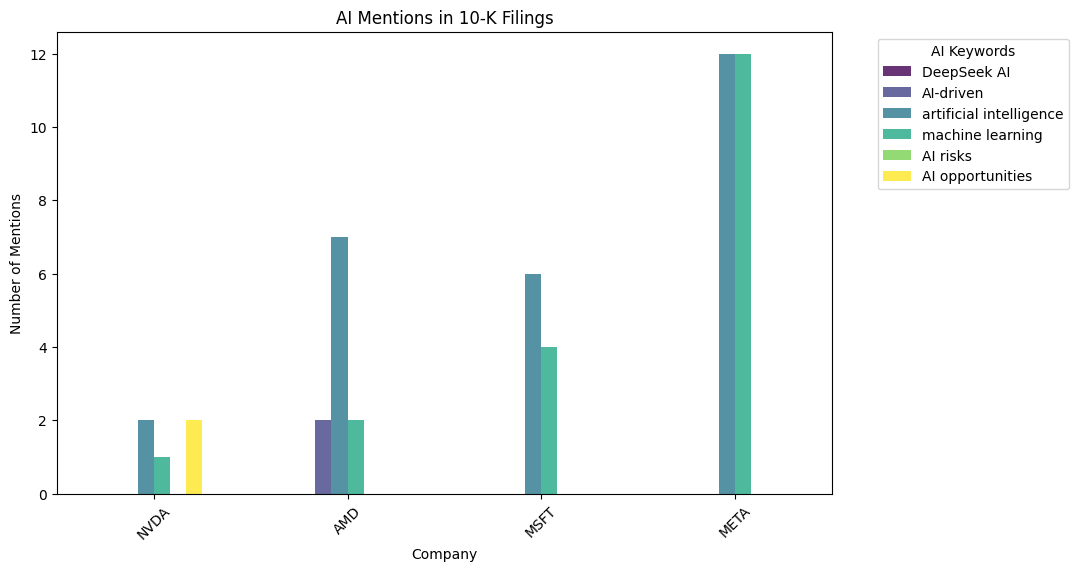

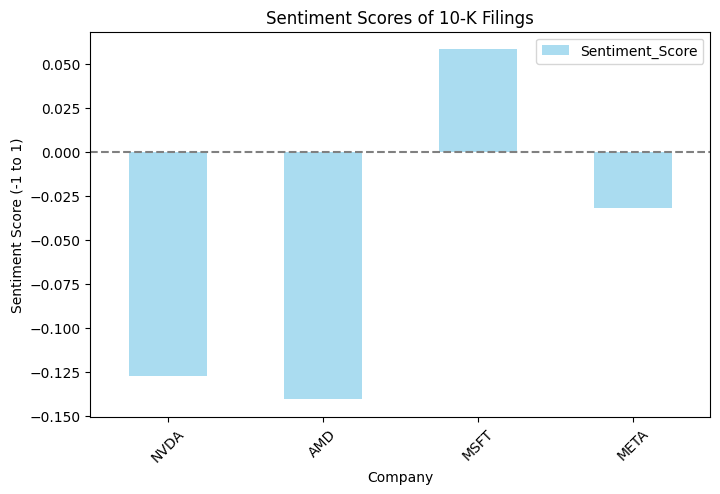

In [ ]:
import re
import os
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define AI-related keywords
AI_KEYWORDS = [
    "DeepSeek AI", "AI-driven", "artificial intelligence",
    "machine learning", "AI risks", "AI opportunities"
]

# Function to analyze AI mentions in text
def analyze_text_for_ai_mentions(text):
    return {keyword: len(re.findall(keyword, text, re.IGNORECASE)) for keyword in AI_KEYWORDS}

# Initialize list to store results
ai_analysis_results = []

# Loop through all 10-K text files for different companies
for company in COMPANIES.keys():
    file_path = f"{company}_10K.txt"

    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as file:
            company_10k_text = file.read()

        # Perform AI mention analysis
        ai_mentions = analyze_text_for_ai_mentions(company_10k_text)

        # Sentiment Analysis on 10-K Text
        sentiment_score = TextBlob(company_10k_text).sentiment.polarity

        # Store results in a list
        ai_analysis_results.append({
            "Company": company,
            **ai_mentions,
            "Sentiment_Score": sentiment_score
        })

        # Print results
        print(f"\n🔍 AI Mentions in {company} 10-K Filing:")
        for keyword, count in ai_mentions.items():
            print(f"   {keyword}: {count} mentions")
        print(f"📊 Sentiment Score: {sentiment_score:.2f} (Range: -1 to 1)")
        print("-" * 50)

    else:
        print(f"⚠️ No 10-K filing found for {company}.")

# Convert results to DataFrame
df_results = pd.DataFrame(ai_analysis_results)

# Display DataFrame in Google Colab
from google.colab import data_table
data_table.DataTable(df_results)

# Print DataFrame in a structured format
if not df_results.empty:
    print("\n📄 **Summary of AI Mentions & Sentiment Scores**")
    print(df_results.to_string(index=False))

# Plot AI keyword mentions for better visualization
if not df_results.empty:
    df_mentions = df_results.set_index("Company")[AI_KEYWORDS]
    df_mentions.plot(kind="bar", figsize=(10, 6), colormap="viridis", alpha=0.8)
    plt.title("AI Mentions in 10-K Filings")
    plt.ylabel("Number of Mentions")
    plt.xlabel("Company")
    plt.xticks(rotation=45)
    plt.legend(title="AI Keywords", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

    # Plot sentiment scores
    df_results.plot(x="Company", y="Sentiment_Score", kind="bar", figsize=(8, 5), color="skyblue", alpha=0.7)
    plt.title("Sentiment Scores of 10-K Filings")
    plt.ylabel("Sentiment Score (-1 to 1)")
    plt.xlabel("Company")
    plt.xticks(rotation=45)
    plt.axhline(y=0, color="gray", linestyle="--")  # Neutral sentiment line
    plt.show()


### Stock Change Over 6 Months

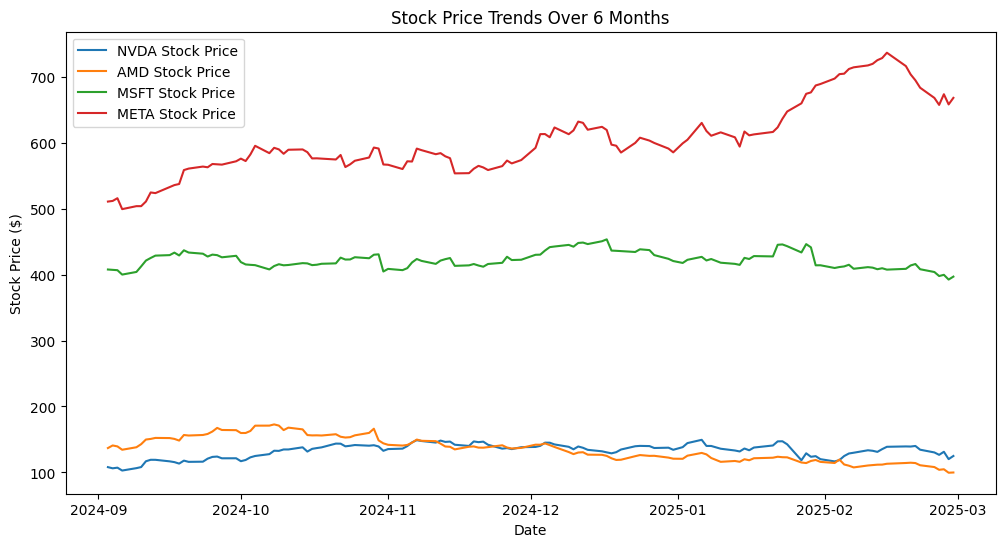

In [ ]:

# Fetch and plot stock price trends for all companies
plt.figure(figsize=(12, 6))
for company in COMPANIES:
    stock_data = yf.Ticker(company).history(period="6mo")
    if not stock_data.empty:
        plt.plot(stock_data.index, stock_data['Close'], label=f"{company} Stock Price")

plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("Stock Price Trends Over 6 Months")
plt.legend()
plt.show()


# The End